In [25]:
import shutil
import importlib as impL
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from math import isnan as isNaN

import scriptFile as sF
import projRelatedHelperFuncs as prHF
import helperFuncs as funcH
import visualize as funcVis

In [2]:
te_u_id = 2
cv_id = 1
nos = 11
ep = 59
model = "resnet18"
pred_fold_base = "/home/doga/DataFolder/sup"

figMulCnt =  1.0
figsize= (9.0, 12.0)


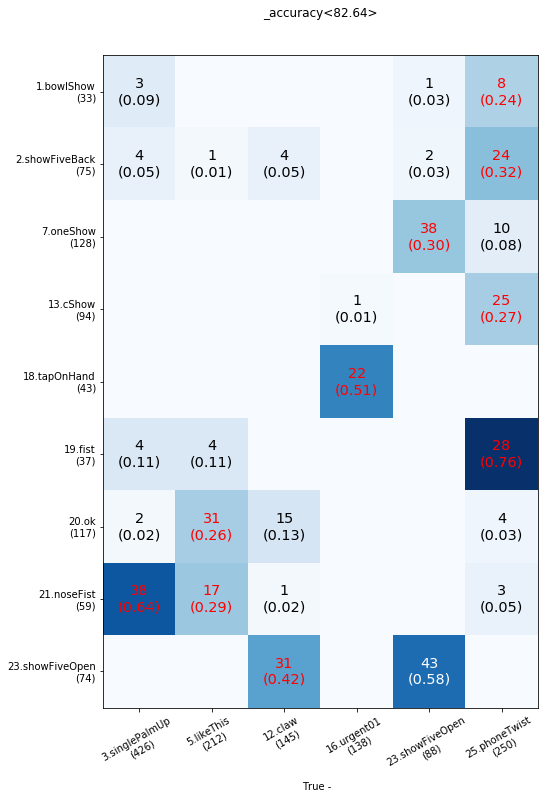

In [53]:
confusionTreshold = 0.2
labelNamesNew, conf_mat = prHF.get_label_names_resnet(te_u_id = te_u_id, cv_id = cv_id, nos = nos, ep = ep, model = model, pred_fold_base = pred_fold_base)
cm = conf_mat["te"]
fig, ax = funcH.plot_confusion_matrix(cm,class_names=labelNamesNew,confusionTreshold=confusionTreshold,show_normed=True, show_only_confused=True)

In [52]:
c_pdf_resnet18 = calc_c_pdf(cm, labelNames=labelNamesNew)
print(c_pdf_resnet18)
#True positive rate (TPR), Recall, Sensitivity = TP / (TP+FN)
#recall(sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved. 
#Positive predictive value (PPV), Precision = TP / (TP+FP)
#precision(PPV) is the fraction of relevant instances among the retrieved instances, 

                   class    #       %prec     %recall         %f1       %wp  \
6              [hipShow]  124  100.000000  100.000000  100.000000  3.194230   
17               [swipe]   99   99.000000  100.000000   99.497487  2.524730   
0        [vaccinateOpen]   77   98.717949   98.717949   98.717949  1.983514   
22      [vaccinateClose]   27  100.000000   96.428571   98.181818  0.721278   
11            [sickShow]  268   97.810219   98.168498   97.989031  6.878462   
24  [singlePalmUpDouble]  284   93.421053   96.598639   94.983278  7.075165   
10            [headShow]  314   91.545190   96.319018   93.871450  7.687721   
26          [frustrated]  407   89.254386   97.601918   93.241695  9.587604   
4             [urgent02]   87   82.857143   93.548387   87.878788  1.984986   
14            [sideFive]  147   99.324324   72.413793   83.760684  5.193930   
8               [meShow]  280   89.743590   72.538860   80.229226  8.923500   
9         [shoulderShow]   24   92.307692   70.58823

In [41]:
cm_student = np.load('/home/doga/Downloads/student-bs-256-test-dataset.npy')
cm_student_2 = np.load('/home/doga/Downloads/student-bs-256-test-dataset-2.npy')
cm_teacher = np.load('/home/doga/Downloads/teacher-bs-256-test-dataset.npy')
labels = ['airplane', 'automobile', 'bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

figMulCnt =  0.75


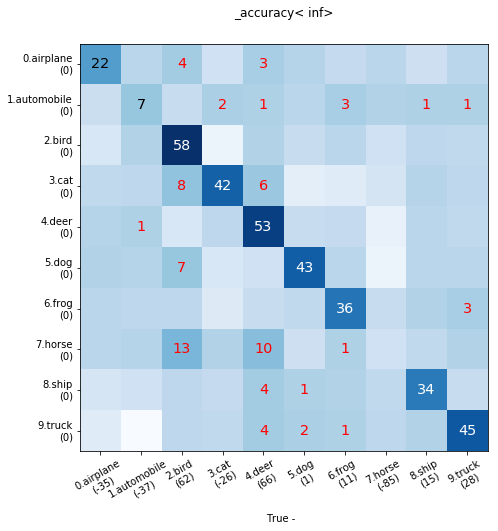

figMulCnt =  0.75


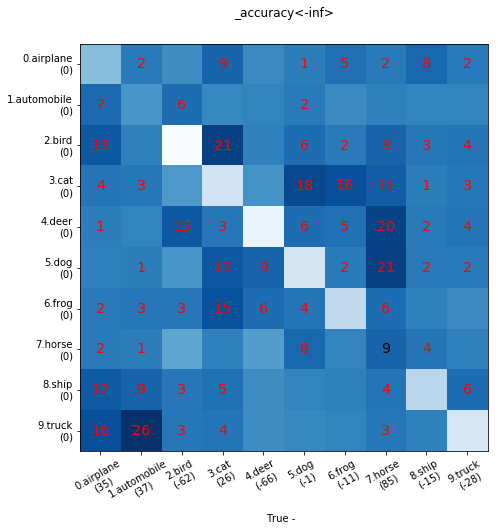

In [42]:
fig_st, ax_st = funcH.plot_confusion_matrix(cm_student-cm_teacher,class_names=labels)
fig_st, ax_st = funcH.plot_confusion_matrix(cm_teacher-cm_student,class_names=labels)

In [43]:
def calc_c_pdf(_confMat, labelNames=None):
    c_data = []
    uniq_labels = np.arange(_confMat.shape[0])
    sampleCount = np.sum(np.sum(_confMat))
    trueCnt = np.sum(_confMat, axis=1)
    predCnt = np.sum(_confMat, axis=0)
    weightedPrecision = 0
    weightedRecall = 0
    weightedF1Score = 0
    for i in range(0, _confMat.shape[0]):
        class_cur = uniq_labels[i]
        #mappedKlusters = getInds(kluster2Classes, class_cur)

        correctCnt = _confMat[class_cur, class_cur]
        if correctCnt==0:
            recallCur = 0
            precisionCur = 0
            f1Cur = 0
        else:
            recallCur = 100 * (correctCnt / trueCnt[class_cur])
            precisionCur = 100 * (correctCnt / predCnt[class_cur])
            f1Cur = 2 * ((precisionCur * recallCur) / (precisionCur + recallCur))
        if isNaN(f1Cur):
            print("****************************None")

        wp = precisionCur * (trueCnt[class_cur] / sampleCount)
        wr = recallCur * (trueCnt[class_cur] / sampleCount)
        wf = f1Cur * ((trueCnt[class_cur]) / (sampleCount))

        weightedPrecision += wp
        weightedRecall += wr
        weightedF1Score += wf

        cStr = ["c(" + class_cur + ")" if labelNames is None else labelNames[class_cur]]
        c_data.append([cStr, correctCnt, precisionCur, recallCur, f1Cur, wp, wr, wf])
    c_pdf = pd.DataFrame(c_data, columns=['class', '#', '%prec', '%recall', '%f1', '%wp', '%wr', '%wf'])
    c_pdf.sort_values(by=['%f1', '#'], inplace=True, ascending=[False, False])
    return c_pdf

figMulCnt =  1.0


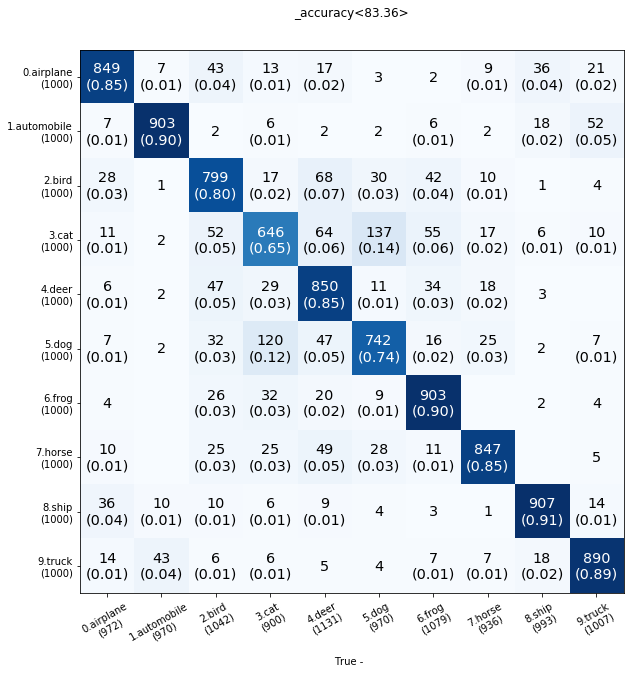

          class    #      %prec  %recall        %f1       %wp   %wr       %wf
1  [automobile]  903  93.092784     90.3  91.675127  9.309278  9.03  9.167513
8        [ship]  907  91.339376     90.7  91.018565  9.133938  9.07  9.101856
9       [truck]  890  88.381331     89.0  88.689586  8.838133  8.90  8.868959
7       [horse]  847  90.491453     84.7  87.500000  9.049145  8.47  8.750000
6        [frog]  903  83.688601     90.3  86.868687  8.368860  9.03  8.686869
0    [airplane]  849  87.345679     84.9  86.105477  8.734568  8.49  8.610548
4        [deer]  850  75.154730     85.0  79.774754  7.515473  8.50  7.977475
2        [bird]  799  76.679463     79.9  78.256611  7.667946  7.99  7.825661
5         [dog]  742  76.494845     74.2  75.329949  7.649485  7.42  7.532995
3         [cat]  646  71.777778     64.6  68.000000  7.177778  6.46  6.800000


In [44]:
fig_st, ax_st = funcH.plot_confusion_matrix(cm_student,class_names=labels,show_normed=True, show_only_confused=False)
c_pdf_s1 = calc_c_pdf(cm_student, labelNames=labels)
print(c_pdf_s1)

figMulCnt =  1.0


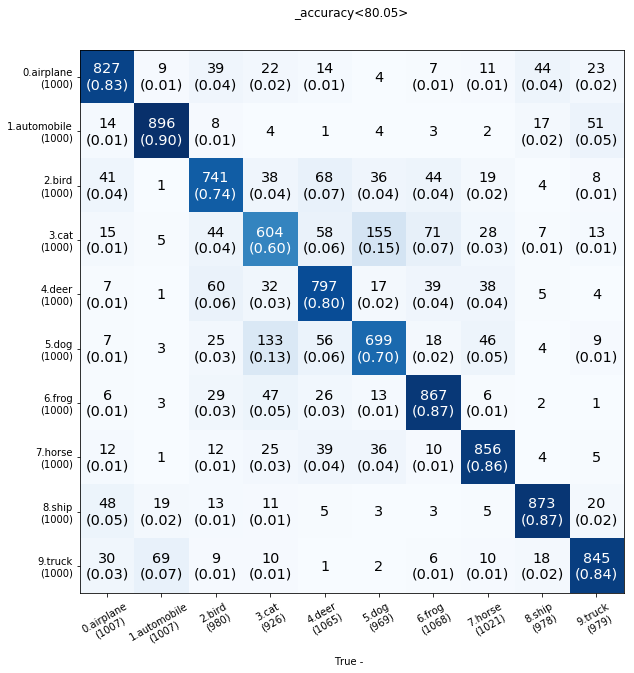

          class    #      %prec  %recall        %f1       %wp   %wr       %wf
1  [automobile]  896  88.977160     89.6  89.287494  8.897716  8.96  8.928749
8        [ship]  873  89.263804     87.3  88.270981  8.926380  8.73  8.827098
9       [truck]  845  86.312564     84.5  85.396665  8.631256  8.45  8.539666
7       [horse]  856  83.839373     85.6  84.710539  8.383937  8.56  8.471054
6        [frog]  867  81.179775     86.7  83.849130  8.117978  8.67  8.384913
0    [airplane]  827  82.125124     82.7  82.411560  8.212512  8.27  8.241156
4        [deer]  797  74.835681     79.7  77.191283  7.483568  7.97  7.719128
2        [bird]  741  75.612245     74.1  74.848485  7.561224  7.41  7.484848
5         [dog]  699  72.136223     69.9  71.000508  7.213622  6.99  7.100051
3         [cat]  604  65.226782     60.4  62.720665  6.522678  6.04  6.272066


In [45]:
fig_tea, ax_tea = funcH.plot_confusion_matrix(cm_teacher,class_names=labels,show_normed=True, show_only_confused=False)
c_pdf_tea = calc_c_pdf(cm_teacher, labelNames=labels)
print(c_pdf_tea)

figMulCnt =  1.0


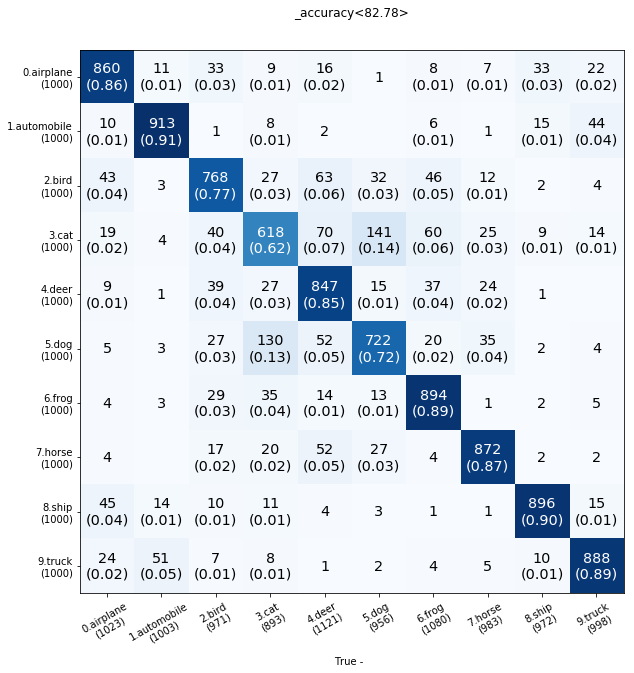

          class    #      %prec  %recall        %f1       %wp   %wr       %wf
1  [automobile]  913  91.026919     91.3  91.163255  9.102692  9.13  9.116326
8        [ship]  896  92.181070     89.6  90.872211  9.218107  8.96  9.087221
9       [truck]  888  88.977956     88.8  88.888889  8.897796  8.88  8.888889
7       [horse]  872  88.708037     87.2  87.947554  8.870804  8.72  8.794755
6        [frog]  894  82.777778     89.4  85.961538  8.277778  8.94  8.596154
0    [airplane]  860  84.066471     86.0  85.022244  8.406647  8.60  8.502224
4        [deer]  847  75.557538     84.7  79.867987  7.555754  8.47  7.986799
2        [bird]  768  79.093718     76.8  77.929985  7.909372  7.68  7.792998
5         [dog]  722  75.523013     72.2  73.824131  7.552301  7.22  7.382413
3         [cat]  618  69.204927     61.8  65.293185  6.920493  6.18  6.529319


In [48]:
fig_st_2, ax_st_2 = funcH.plot_confusion_matrix(cm_student_2,class_names=labels,show_normed=True, show_only_confused=False)
c_pdf_s2 = calc_c_pdf(cm_student_2, labelNames=labels)
print(c_pdf_s2)

In [49]:
c_pdf_s1.sort_index()
c_pdf_tea.sort_index()
c_pdf_s2.sort_index()

c_pdf_f1 = c_pdf_s1[['class', '%f1']].sort_index().rename(columns={"class": "f1Score", "%f1": "st0"})
c_pdf_f1.insert(2, "tea", c_pdf_tea[['%f1']].sort_index(), True)
c_pdf_f1.insert(3, "st1", c_pdf_s2[['%f1']].sort_index(), True)
print(c_pdf_f1)

        f1Score        st0        tea        st1
0    [airplane]  86.105477  82.411560  85.022244
1  [automobile]  91.675127  89.287494  91.163255
2        [bird]  78.256611  74.848485  77.929985
3         [cat]  68.000000  62.720665  65.293185
4        [deer]  79.774754  77.191283  79.867987
5         [dog]  75.329949  71.000508  73.824131
6        [frog]  86.868687  83.849130  85.961538
7       [horse]  87.500000  84.710539  87.947554
8        [ship]  91.018565  88.270981  90.872211
9       [truck]  88.689586  85.396665  88.888889


In [50]:
c_pdf_prec = c_pdf_s1[['class', '%prec']].sort_index().rename(columns={"class": "precision", "%prec": "st0"})
c_pdf_prec.insert(2, "tea", c_pdf_tea[['%prec']].sort_index(), True)
c_pdf_prec.insert(3, "st1", c_pdf_s2[['%prec']].sort_index(), True)
print(c_pdf_prec)

      precision        st0        tea        st1
0    [airplane]  87.345679  82.125124  84.066471
1  [automobile]  93.092784  88.977160  91.026919
2        [bird]  76.679463  75.612245  79.093718
3         [cat]  71.777778  65.226782  69.204927
4        [deer]  75.154730  74.835681  75.557538
5         [dog]  76.494845  72.136223  75.523013
6        [frog]  83.688601  81.179775  82.777778
7       [horse]  90.491453  83.839373  88.708037
8        [ship]  91.339376  89.263804  92.181070
9       [truck]  88.381331  86.312564  88.977956


In [51]:
c_pdf_rec = c_pdf_s1[['class', '%recall']].sort_index().rename(columns={"class": "recall", "%recall": "st0"})
c_pdf_rec.insert(2, "tea", c_pdf_tea[['%recall']].sort_index(), True)
c_pdf_rec.insert(3, "st1", c_pdf_s2[['%recall']].sort_index(), True)
print(c_pdf_rec)

         recall   st0   tea   st1
0    [airplane]  84.9  82.7  86.0
1  [automobile]  90.3  89.6  91.3
2        [bird]  79.9  74.1  76.8
3         [cat]  64.6  60.4  61.8
4        [deer]  85.0  79.7  84.7
5         [dog]  74.2  69.9  72.2
6        [frog]  90.3  86.7  89.4
7       [horse]  84.7  85.6  87.2
8        [ship]  90.7  87.3  89.6
9       [truck]  89.0  84.5  88.8


In [73]:
import pycm
cm_student
type(cm_student)

numpy.ndarray

In [147]:
def convert_ndarray_to_dict(cm_in, labels=None):
    labelCnt = cm_in.shape[0]
    cm_dict = {}
    for irow in range(0, labelCnt):
        cm_col_dict = {}
        rowLabel = irow
        if labels is not None:
            rowLabel = labels[irow]
        for jcol in range(0, labelCnt):                    
            colLabel = jcol
            if labels is not None:
                colLabel = labels[jcol]
            cm_col_dict[colLabel] = cm_in[irow][jcol]
        cm_dict[rowLabel] = cm_col_dict
    #print(cm_in)
    #print(cm_dict)    
    return cm_dict
cm_student_dict = convert_ndarray_to_dict(cm_student)
cm_teacher_dict = convert_ndarray_to_dict(cm_teacher)
cm_student_2_dict = convert_ndarray_to_dict(cm_student_2)

In [150]:
print("cm_student_dict", str(cm_student_dict))
print("cm_teacher_dict", str(cm_teacher_dict))
print("cm_student_2_dict", str(cm_student_2_dict))

cm_student_dict {0: {0: 849, 1: 7, 2: 43, 3: 13, 4: 17, 5: 3, 6: 2, 7: 9, 8: 36, 9: 21}, 1: {0: 7, 1: 903, 2: 2, 3: 6, 4: 2, 5: 2, 6: 6, 7: 2, 8: 18, 9: 52}, 2: {0: 28, 1: 1, 2: 799, 3: 17, 4: 68, 5: 30, 6: 42, 7: 10, 8: 1, 9: 4}, 3: {0: 11, 1: 2, 2: 52, 3: 646, 4: 64, 5: 137, 6: 55, 7: 17, 8: 6, 9: 10}, 4: {0: 6, 1: 2, 2: 47, 3: 29, 4: 850, 5: 11, 6: 34, 7: 18, 8: 3, 9: 0}, 5: {0: 7, 1: 2, 2: 32, 3: 120, 4: 47, 5: 742, 6: 16, 7: 25, 8: 2, 9: 7}, 6: {0: 4, 1: 0, 2: 26, 3: 32, 4: 20, 5: 9, 6: 903, 7: 0, 8: 2, 9: 4}, 7: {0: 10, 1: 0, 2: 25, 3: 25, 4: 49, 5: 28, 6: 11, 7: 847, 8: 0, 9: 5}, 8: {0: 36, 1: 10, 2: 10, 3: 6, 4: 9, 5: 4, 6: 3, 7: 1, 8: 907, 9: 14}, 9: {0: 14, 1: 43, 2: 6, 3: 6, 4: 5, 5: 4, 6: 7, 7: 7, 8: 18, 9: 890}}
cm_teacher_dict {0: {0: 827, 1: 9, 2: 39, 3: 22, 4: 14, 5: 4, 6: 7, 7: 11, 8: 44, 9: 23}, 1: {0: 14, 1: 896, 2: 8, 3: 4, 4: 1, 5: 4, 6: 3, 7: 2, 8: 17, 9: 51}, 2: {0: 41, 1: 1, 2: 741, 3: 38, 4: 68, 5: 36, 6: 44, 7: 19, 8: 4, 9: 8}, 3: {0: 15, 1: 5, 2: 44, 3: 604, 

In [151]:
cm_student_dict = {0: {0: 849, 1: 7, 2: 43, 3: 13, 4: 17, 5: 3, 6: 2, 7: 9, 8: 36, 9: 21}, 1: {0: 7, 1: 903, 2: 2, 3: 6, 4: 2, 5: 2, 6: 6, 7: 2, 8: 18, 9: 52}, 2: {0: 28, 1: 1, 2: 799, 3: 17, 4: 68, 5: 30, 6: 42, 7: 10, 8: 1, 9: 4}, 3: {0: 11, 1: 2, 2: 52, 3: 646, 4: 64, 5: 137, 6: 55, 7: 17, 8: 6, 9: 10}, 4: {0: 6, 1: 2, 2: 47, 3: 29, 4: 850, 5: 11, 6: 34, 7: 18, 8: 3, 9: 0}, 5: {0: 7, 1: 2, 2: 32, 3: 120, 4: 47, 5: 742, 6: 16, 7: 25, 8: 2, 9: 7}, 6: {0: 4, 1: 0, 2: 26, 3: 32, 4: 20, 5: 9, 6: 903, 7: 0, 8: 2, 9: 4}, 7: {0: 10, 1: 0, 2: 25, 3: 25, 4: 49, 5: 28, 6: 11, 7: 847, 8: 0, 9: 5}, 8: {0: 36, 1: 10, 2: 10, 3: 6, 4: 9, 5: 4, 6: 3, 7: 1, 8: 907, 9: 14}, 9: {0: 14, 1: 43, 2: 6, 3: 6, 4: 5, 5: 4, 6: 7, 7: 7, 8: 18, 9: 890}}
cm_teacher_dict = {0: {0: 827, 1: 9, 2: 39, 3: 22, 4: 14, 5: 4, 6: 7, 7: 11, 8: 44, 9: 23}, 1: {0: 14, 1: 896, 2: 8, 3: 4, 4: 1, 5: 4, 6: 3, 7: 2, 8: 17, 9: 51}, 2: {0: 41, 1: 1, 2: 741, 3: 38, 4: 68, 5: 36, 6: 44, 7: 19, 8: 4, 9: 8}, 3: {0: 15, 1: 5, 2: 44, 3: 604, 4: 58, 5: 155, 6: 71, 7: 28, 8: 7, 9: 13}, 4: {0: 7, 1: 1, 2: 60, 3: 32, 4: 797, 5: 17, 6: 39, 7: 38, 8: 5, 9: 4}, 5: {0: 7, 1: 3, 2: 25, 3: 133, 4: 56, 5: 699, 6: 18, 7: 46, 8: 4, 9: 9}, 6: {0: 6, 1: 3, 2: 29, 3: 47, 4: 26, 5: 13, 6: 867, 7: 6, 8: 2, 9: 1}, 7: {0: 12, 1: 1, 2: 12, 3: 25, 4: 39, 5: 36, 6: 10, 7: 856, 8: 4, 9: 5}, 8: {0: 48, 1: 19, 2: 13, 3: 11, 4: 5, 5: 3, 6: 3, 7: 5, 8: 873, 9: 20}, 9: {0: 30, 1: 69, 2: 9, 3: 10, 4: 1, 5: 2, 6: 6, 7: 10, 8: 18, 9: 845}}
cm_student_2_dict = {0: {0: 860, 1: 11, 2: 33, 3: 9, 4: 16, 5: 1, 6: 8, 7: 7, 8: 33, 9: 22}, 1: {0: 10, 1: 913, 2: 1, 3: 8, 4: 2, 5: 0, 6: 6, 7: 1, 8: 15, 9: 44}, 2: {0: 43, 1: 3, 2: 768, 3: 27, 4: 63, 5: 32, 6: 46, 7: 12, 8: 2, 9: 4}, 3: {0: 19, 1: 4, 2: 40, 3: 618, 4: 70, 5: 141, 6: 60, 7: 25, 8: 9, 9: 14}, 4: {0: 9, 1: 1, 2: 39, 3: 27, 4: 847, 5: 15, 6: 37, 7: 24, 8: 1, 9: 0}, 5: {0: 5, 1: 3, 2: 27, 3: 130, 4: 52, 5: 722, 6: 20, 7: 35, 8: 2, 9: 4}, 6: {0: 4, 1: 3, 2: 29, 3: 35, 4: 14, 5: 13, 6: 894, 7: 1, 8: 2, 9: 5}, 7: {0: 4, 1: 0, 2: 17, 3: 20, 4: 52, 5: 27, 6: 4, 7: 872, 8: 2, 9: 2}, 8: {0: 45, 1: 14, 2: 10, 3: 11, 4: 4, 5: 3, 6: 1, 7: 1, 8: 896, 9: 15}, 9: {0: 24, 1: 51, 2: 7, 3: 8, 4: 1, 5: 2, 6: 4, 7: 5, 8: 10, 9: 888}}

In [131]:
cm_dict = {0: {0: 849, 1: 7, 2: 43, 3: 13, 4: 17, 5: 3, 6: 2, 7: 9, 8: 36, 9: 21},
 1: {0: 7, 1: 903, 2: 2, 3: 6, 4: 2, 5: 2, 6: 6, 7: 2, 8: 18, 9: 52},
 2: {0: 28, 1: 1, 2: 799, 3: 17, 4: 68, 5: 30, 6: 42, 7: 10, 8: 1, 9: 4},
 3: {0: 11, 1: 2, 2: 52, 3: 646, 4: 64, 5: 137, 6: 55, 7: 17, 8: 6, 9: 10},
 4: {0: 6, 1: 2, 2: 47, 3: 29, 4: 850, 5: 11, 6: 34, 7: 18, 8: 3, 9: 0},
 5: {0: 7, 1: 2, 2: 32, 3: 120, 4: 47, 5: 742, 6: 16, 7: 25, 8: 2, 9: 7},
 6: {0: 4, 1: 0, 2: 26, 3: 32, 4: 20, 5: 9, 6: 903, 7: 0, 8: 2, 9: 4},
 7: {0: 10, 1: 0, 2: 25, 3: 25, 4: 49, 5: 28, 6: 11, 7: 847, 8: 0, 9: 5},
 8: {0: 36, 1: 10, 2: 10, 3: 6, 4: 9, 5: 4, 6: 3, 7: 1, 8: 907, 9: 14},
 9: {0: 14, 1: 43, 2: 6, 3: 6, 4: 5, 5: 4, 6: 7, 7: 7, 8: 18, 9: 890}}
cm_dict

{0: {0: 849, 1: 7, 2: 43, 3: 13, 4: 17, 5: 3, 6: 2, 7: 9, 8: 36, 9: 21},
 1: {0: 7, 1: 903, 2: 2, 3: 6, 4: 2, 5: 2, 6: 6, 7: 2, 8: 18, 9: 52},
 2: {0: 28, 1: 1, 2: 799, 3: 17, 4: 68, 5: 30, 6: 42, 7: 10, 8: 1, 9: 4},
 3: {0: 11, 1: 2, 2: 52, 3: 646, 4: 64, 5: 137, 6: 55, 7: 17, 8: 6, 9: 10},
 4: {0: 6, 1: 2, 2: 47, 3: 29, 4: 850, 5: 11, 6: 34, 7: 18, 8: 3, 9: 0},
 5: {0: 7, 1: 2, 2: 32, 3: 120, 4: 47, 5: 742, 6: 16, 7: 25, 8: 2, 9: 7},
 6: {0: 4, 1: 0, 2: 26, 3: 32, 4: 20, 5: 9, 6: 903, 7: 0, 8: 2, 9: 4},
 7: {0: 10, 1: 0, 2: 25, 3: 25, 4: 49, 5: 28, 6: 11, 7: 847, 8: 0, 9: 5},
 8: {0: 36, 1: 10, 2: 10, 3: 6, 4: 9, 5: 4, 6: 3, 7: 1, 8: 907, 9: 14},
 9: {0: 14, 1: 43, 2: 6, 3: 6, 4: 5, 5: 4, 6: 7, 7: 7, 8: 18, 9: 890}}

In [152]:
CM_student = pycm.ConfusionMatrix(matrix=cm_student_dict,digit=10)
CM_teacher= pycm.ConfusionMatrix(matrix=cm_teacher_dict,digit=10)
CM_student_2 = pycm.ConfusionMatrix(matrix=cm_student_2_dict,digit=10)

In [154]:
cp3 = pycm.Compare({"cm_student":CM_student,"cm_student_2":CM_student_2,"cm_teacher":CM_teacher})
print(cp3)

Best : cm_student

Rank   Name            Class-Score     Overall-Score
1      cm_student      49.85           5.8
2      cm_student_2    48.95           5.8
3      cm_teacher      47.85           5.26667



In [155]:
cp3.sorted

['cm_student', 'cm_student_2', 'cm_teacher']

In [156]:
CM_student.class_stat

{'TPR': {0: 0.849,
  1: 0.903,
  2: 0.799,
  3: 0.646,
  4: 0.85,
  5: 0.742,
  6: 0.903,
  7: 0.847,
  8: 0.907,
  9: 0.89},
 'TNR': {0: 0.9863333333333333,
  1: 0.9925555555555555,
  2: 0.973,
  3: 0.9717777777777777,
  4: 0.9687777777777777,
  5: 0.9746666666666667,
  6: 0.9804444444444445,
  7: 0.9901111111111112,
  8: 0.9904444444444445,
  9: 0.987},
 'PPV': {0: 0.8734567901234568,
  1: 0.9309278350515464,
  2: 0.7667946257197696,
  3: 0.7177777777777777,
  4: 0.7515473032714411,
  5: 0.7649484536082474,
  6: 0.8368860055607044,
  7: 0.9049145299145299,
  8: 0.9133937562940584,
  9: 0.8838133068520357},
 'NPV': {0: 0.9832742578644218,
  1: 0.9892580287929125,
  2: 0.977561955793704,
  3: 0.9610989010989011,
  4: 0.9830871575149397,
  5: 0.9714285714285714,
  6: 0.9891267795090236,
  7: 0.9831200353045013,
  8: 0.989674697457533,
  9: 0.9877682642054931},
 'FNR': {0: 0.15100000000000002,
  1: 0.09699999999999998,
  2: 0.20099999999999996,
  3: 0.354,
  4: 0.15000000000000002,
  5: 